In [86]:
import h5py
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from matplotlib.patches import Patch


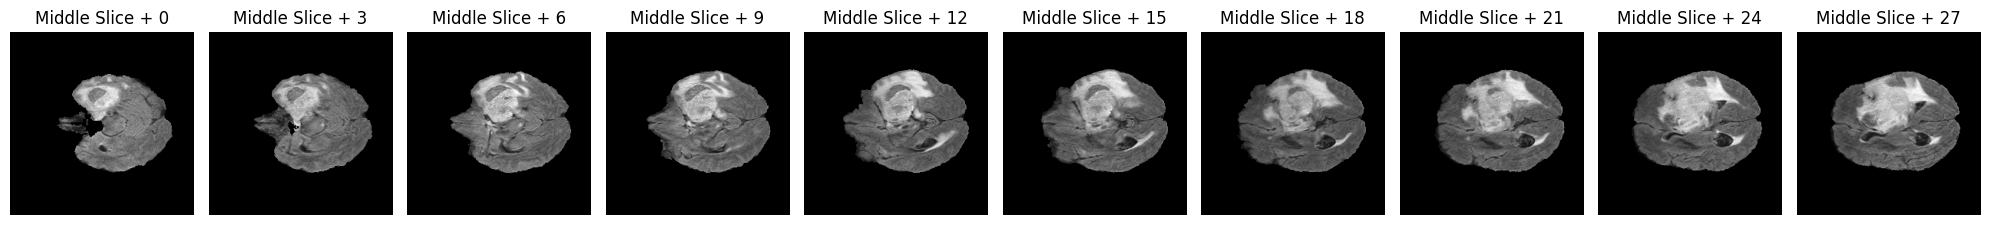

In [87]:
# Load the NIfTI file
file_path = r'C:\Users\johns\OneDrive\Desktop\Datasets\ECE-542\brain-tumor-segmentation(nii)\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii'  # Replace "your_file.nii" with the path to your NIfTI file
img = nib.load(file_path)
img_data = img.get_fdata()

# Define the number of slices and the middle slice
num_slices = 10
middle_slice = 50  # Adjust as needed
num_rows = 1
num_cols = num_slices

plt.figure(figsize=(20, 5))

for i in range(num_slices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img_data[:, :, middle_slice + 3 * i], cmap='gray')  # Adjust slice increment as needed
    plt.title('Middle Slice + {}'.format(3 * i))
    plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\johns\AppData\Local\Temp\ipykernel_5724\3872864640.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(slice_seg == label, colors=info['color'], levels=[0.5], label=f'Label {label}')


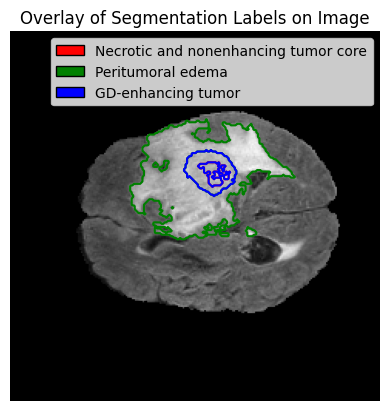

In [89]:
# Load the NIfTI files
image_file = r'C:\Users\johns\OneDrive\Desktop\Datasets\ECE-542\brain-tumor-segmentation(nii)\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii'  # Replace "image.nii" with the path to your image NIfTI file
seg_file = r'C:\Users\johns\OneDrive\Desktop\Datasets\ECE-542\brain-tumor-segmentation(nii)\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii'  # Replace "segmentation.nii" with the path to your segmentation NIfTI file
image_data = nib.load(image_file).get_fdata()
seg_data = nib.load(seg_file).get_fdata()

# Define the colormap for each label along with label names
label_colors = {
    1: {'color': 'red', 'name': 'Necrotic and nonenhancing tumor core'},
    2: {'color': 'green', 'name': 'Peritumoral edema'},
    4: {'color': 'blue', 'name': 'GD-enhancing tumor'}
}

# Choose the slice you want to visualize
slice_index = 75  # Replace 75 with the index of the slice you want to visualize

# Get the specified slice from the image data and segmentation data
slice_image = image_data[:, :, slice_index]
slice_seg = seg_data[:, :, slice_index]

# Plot the image
plt.imshow(slice_image, cmap='gray')

# Overlay the segmentation on the image with corresponding colors
for label, info in label_colors.items():
    plt.contour(slice_seg == label, colors=info['color'], levels=[0.5], label=f'Label {label}')

# Create legend
legend_elements = [Patch(facecolor=info['color'], edgecolor='k', label=info['name']) for label, info in label_colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Overlay of Segmentation Labels on Image')
plt.axis('off')
plt.show()